<a href="https://colab.research.google.com/github/idevede/-_-/blob/master/TimeGPT_1_getting_started_short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TimeGPT Quickstart

> Unlock the power of accurate predictions and confidently navigate uncertainty. Reduce uncertainty and resource limitations.
> With TimeGPT, you can effortlessly access state-of-the-art models to make data-driven decisions. Whether you're a bank
> forecasting market trends or a startup predicting product demand, TimeGPT democratizes access to cutting-edge predictive
> insights.

In [1]:
!pip install nixtlats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
#| hide
from nixtlats.utils import colab_badge

In [ ]:
#| echo: false
colab_badge('docs/getting-started/1_getting_started_short')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/getting-started/1_getting_started_short.ipynb)

## Introduction

Nixtla's TimeGPT is a generative pre-trained forecasting model for time series data. TimeGPT can produce accurate forecasts for new time series without training, using only historical values as inputs. TimeGPT can be used across a plethora of tasks including demand forecasting, anomaly detection, financial forecasting, and more.

The TimeGPT model "reads" time series data much like the way humans read a sentence – from left to right. It looks at windows of past data, which we can think of as "tokens", and predicts what comes next. This prediction is based on patterns the model identifies in past data and extrapolates into the future.

The API provides an interface to TimeGPT, allowing users to leverage its forecasting capabilities to predict future events. TimeGPT can also be used for other time series-related tasks, such as what-if scenarios, anomaly detection, and more.

![figure](https://github.com/Nixtla/nixtla/blob/main/nbs/img/timegpt-arch.png?raw=1)

## Usage

In [ ]:
!pip install python-dotenv


In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()

False

In [ ]:
from nixtlats import TimeGPT

You can instantiate the `TimeGPT` class providing your credentials.

In [ ]:
!TIMEGPT_TOKEN=c6q2DC7IvgrZVjJPGSreRc3YIkXvv38n4Rdrh5qDYL0R32Q2wsLMcuenMD2p1I0QbtIXwXhFKTtNGkGcuwblYmNZVpp4rrHm3pgXNPYK9OnGfs26loZRsijTeco4VsHDXw0YtFM8hOuIBdALDVV3FYzvm23Az05usabQYDTIAv1XytvcGNlj7iGs9U1DRYM5Jsof1hgXyIt4SPi0YngMdNVL6be3hjQBNAwh234iuPSm4M9iVJYW7Wb3lxd5Bcp2

In [ ]:
timegpt = TimeGPT(
    # defaults to os.environ.get("TIMEGPT_TOKEN")
    token = 'c6q2DC7IvgrZVjJPGSreRc3YIkXvv38n4Rdrh5qDYL0R32Q2wsLMcuenMD2p1I0QbtIXwXhFKTtNGkGcuwblYmNZVpp4rrHm3pgXNPYK9OnGfs26loZRsijTeco4VsHDXw0YtFM8hOuIBdALDVV3FYzvm23Az05usabQYDTIAv1XytvcGNlj7iGs9U1DRYM5Jsof1hgXyIt4SPi0YngMdNVL6be3hjQBNAwh234iuPSm4M9iVJYW7Wb3lxd5Bcp2'
)

You can test the validate of your token calling the `validate_token` method:

In [ ]:
timegpt.validate_token()

True

Now you can start making forecasts! Let's import an example on the classic `AirPassengers` dataset. This dataset contains the monthly number of airline passengers in Australia between 1949 and 1960. First, let's load the dataset and plot it:

In [ ]:
import pandas as pd
import os

In [ ]:
all_file = os.listdir('./')

In [ ]:
df = pd.read_csv('./ettm2-96-280.csv')
df.head()

,timestamp,TimeGPT
0,2017-11-22 02:30:00,-0.917249
1,2017-11-22 02:45:00,-0.917249
2,2017-11-22 03:00:00,-0.936203
3,2017-11-22 03:15:00,-0.936203
4,2017-11-22 03:30:00,-0.955157


In [ ]:
df_336 = df[:336]

In [ ]:
len(df_336)

336

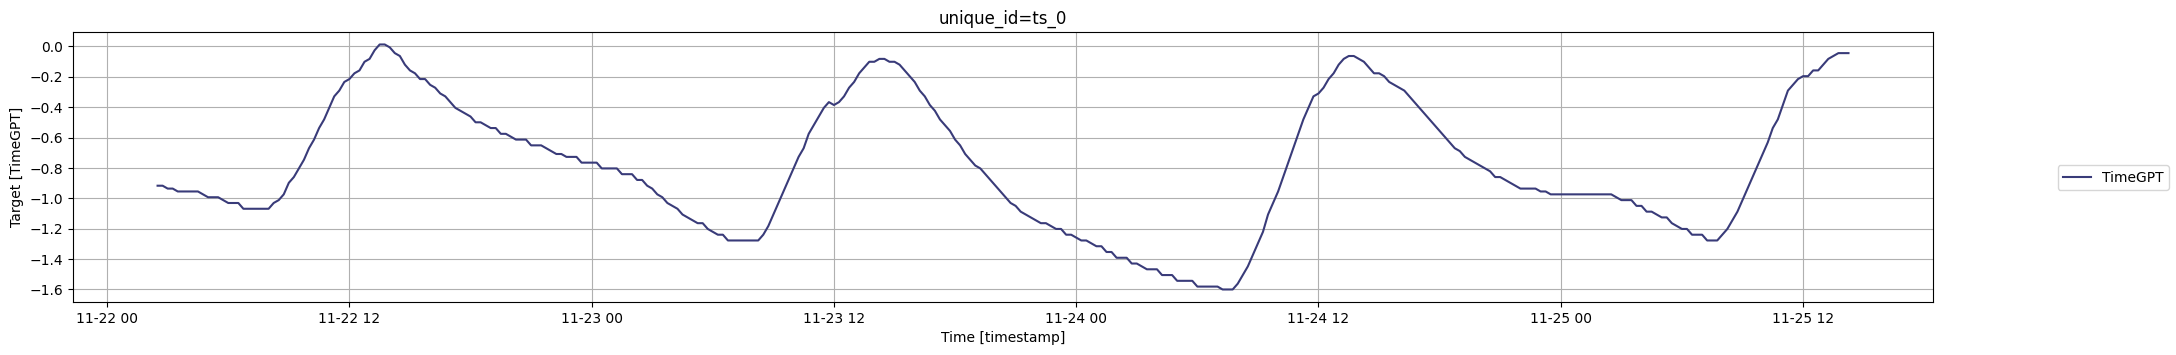

In [ ]:
timegpt.plot(df, time_col='timestamp', target_col='TimeGPT')

:::{.callout-tip collapse=true}
## Important requirements of the data

* Make sure the target variable column does not have missing or non-numeric values.
* Do not include gaps/jumps in the datestamps (for the given frequency) between the first and late datestamps. The forecast function will not impute missing dates.
* The format of the datestamp column should be readable by Pandas (see [this link](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) for more details).
:::

Next, forecast the next 12 months using the SDK `forecast` method. Set the following parameters:

- `df`: A pandas dataframe containing the time series data.
- `h`: The number of steps ahead to forecast.
- `freq`: The frequency of the time series in Pandas format. See [pandas’ available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
- `time_col`: Column that identifies the datestamp column.
- `target_col`: The variable that we want to forecast.

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df_336, h=96, freq='15min', time_col='timestamp', target_col='TimeGPT')
timegpt_fcst_df.head()

,timestamp,TimeGPT
0,2017-11-25 14:30:00,-0.005534
1,2017-11-25 14:45:00,0.012901
2,2017-11-25 15:00:00,0.034058
3,2017-11-25 15:15:00,0.043268
4,2017-11-25 15:30:00,0.061048


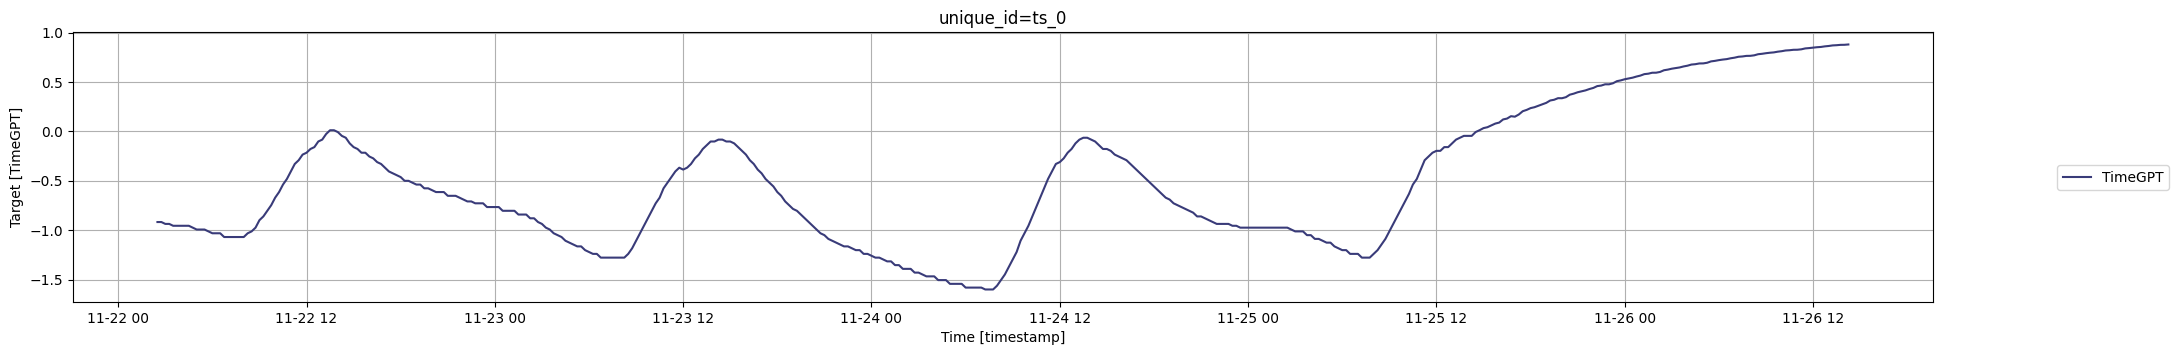

In [ ]:
timegpt.plot(df_336, timegpt_fcst_df, time_col='timestamp', target_col='TimeGPT')

You can also produce a longer forecasts increasing the horizon parameter. For example, let's forecast the next 36 months:

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df_336, h=96, time_col='timestamp', target_col='TimeGPT', freq='15min', model='timegpt-1-long-horizon')
timegpt_fcst_df.head()

,timestamp,TimeGPT
0,2017-11-25 14:30:00,-0.031016
1,2017-11-25 14:45:00,-0.012196
2,2017-11-25 15:00:00,0.002122
3,2017-11-25 15:15:00,0.012710
4,2017-11-25 15:30:00,0.048817


In [ ]:
timegpt_fcst_df.to_csv('./ettm2-96-280-predict.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

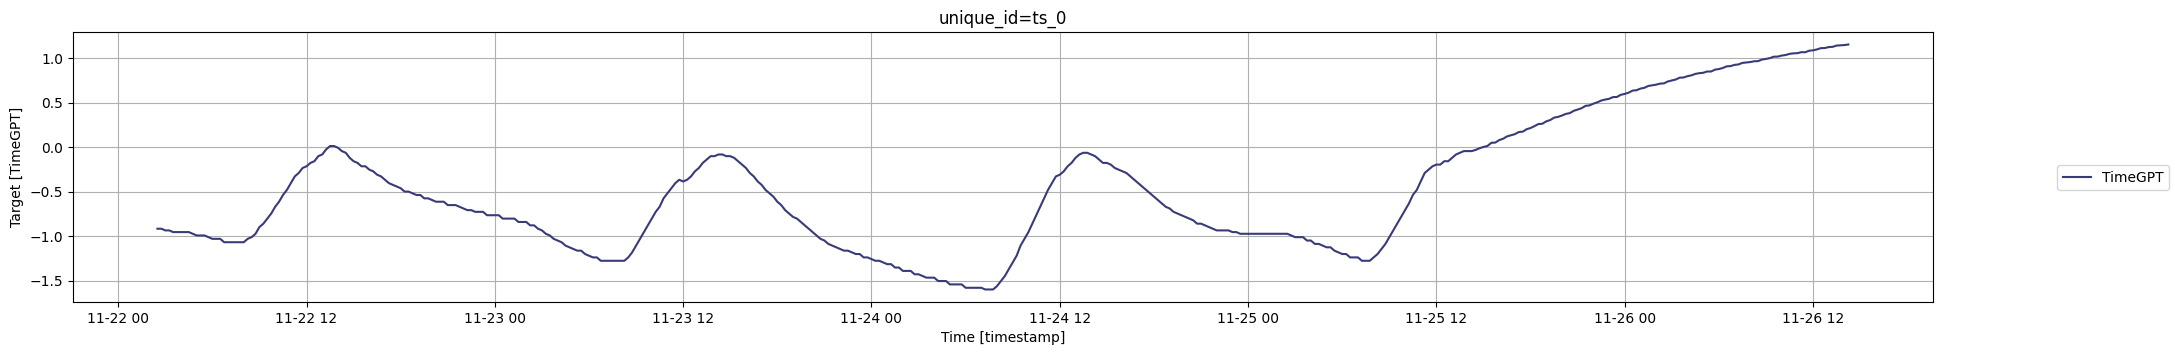

In [ ]:
timegpt.plot(df_336, timegpt_fcst_df, time_col='timestamp', target_col='TimeGPT')

Or a shorter one:

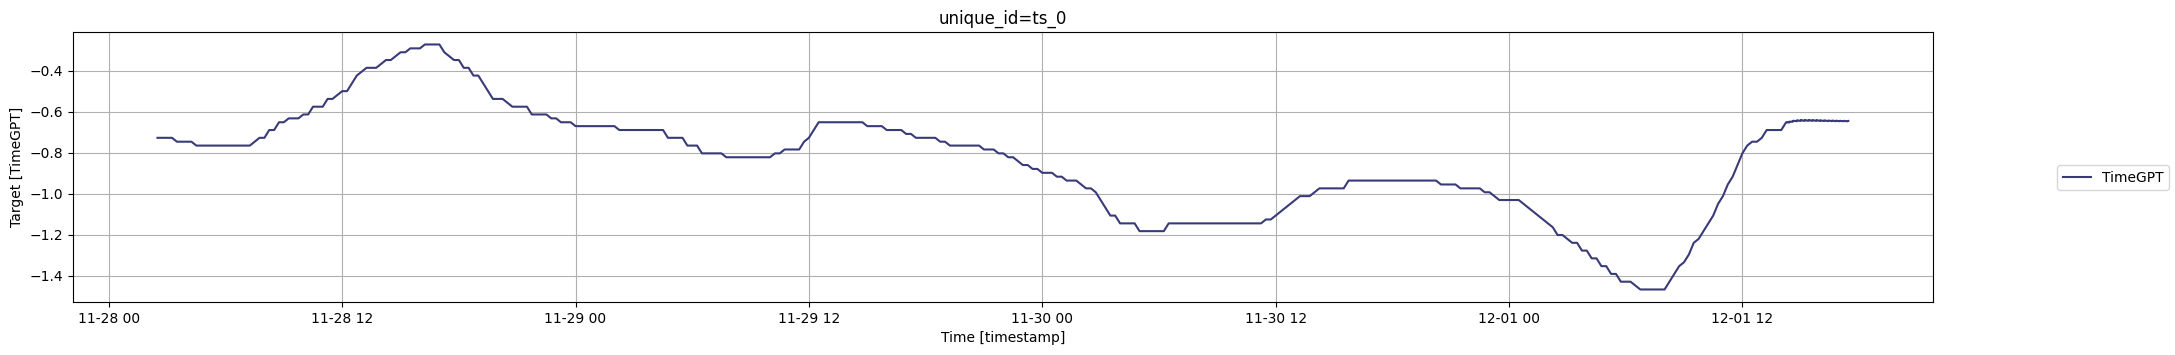

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df[300:336], h=192, time_col='timestamp', target_col='TimeGPT', freq='min', model='timegpt-1-long-horizon')
timegpt.plot(df_336, timegpt_fcst_df, time_col='timestamp', target_col='TimeGPT')

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df, h=6, time_col='timestamp', target_col='value', freq='MS')
timegpt.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

KeyError: "['y'] not in index"

::: {.callout-warning}
TimeGPT-1 is currently optimized for short horizon forecasting. While the `forecast` mehtod will allow any positive and large horizon, the accuracy of the forecasts might degrade. We are currently working to improve the accuracy on longer forecasts.
:::

## Using DateTime index to infer frequency

The freq parameter, which indicates the time unit between consecutive data points, is particularly critical. Fortunately, you can pass a DataFrame with a DateTime index to the forecasting method, ensuring that your time series data is equipped with necessary temporal features. By assigning a suitable freq parameter to the DateTime index of a DataFrame, you inform the model about the consistent interval between observations — be it days ('D'), months ('M'), or another suitable frequency.

In [ ]:
df_time_index = df.set_index('timestamp')
df_time_index.index = pd.DatetimeIndex(df_time_index.index, freq='MS')
timegpt.forecast(df=df, h=36, time_col='timestamp', target_col='value').head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: MS
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.837952
1,1961-02-01,426.062744
2,1961-03-01,463.116577
3,1961-04-01,478.244507
4,1961-05-01,505.646484
